<a href="https://colab.research.google.com/github/yeahginny/TextAnalysis/blob/main/0904_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
jobs = pd.read_csv('Jobs.csv')
jobs.head()

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."


In [ ]:
jobs

,Unnamed: 0,title,company,announcement,description
0,0,"Senior Analyst, Data Science and Analytics",TransUnion,The Muse,TransUnion's Job Applicant Privacy Notice Wha...
1,1,Senior Data Scientist,"Grubhub Holdings, Inc.",ZipRecruiter,About The Opportunity We're all about connect...
2,2,Lead Data Science Analyst,Discover Financial Services,LinkedIn,"Discover. A brighter future. With us, you’ll ..."
3,3,Data Science Intern,AbelsonTaylor,Startup Jobs,Are you a 2023 college graduate or rising coll...
4,4,Data Scientist,NORC at the University of Chicago,SimplyHired,"JOB DESCRIPTION: At NORC, Data Scientists pla..."
...,...,...,...,...,...
785,785,Research and Data Specialist,GovernmentJobs.com,Learn4Good.com,"Description $3,000 hiring bonus to join the J..."
786,786,Quality Assurance Data Specialist,Metrocare Services,Glassdoor,Are you looking for a purpose-driven career? A...
787,787,Senior Data Analyst,Gopuff,Startup Jobs,The Senior Data Analyst will join as an analyt...
788,788,Cost Controller/Data Analyst,Petroplan,Petroplan,Overview: The Cost Controller / Data Analyst p...


In [ ]:
contents = jobs['description']
contents.head()

0    TransUnion's Job Applicant Privacy Notice  Wha...
1    About The Opportunity  We're all about connect...
2    Discover. A brighter future.  With us, you’ll ...
3    Are you a 2023 college graduate or rising coll...
4    JOB DESCRIPTION:  At NORC, Data Scientists pla...
Name: description, dtype: object

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# 불용어 처리

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopwords = set(stopwords.words("english"))

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
from nltk.tokenize import word_tokenize

words = []

for content in contents:
  EnWords = re.sub(r"[^a-zA-Z]+"," ",str(content)) # 영어가 아닌 것 제거
  EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로 정규화 -> 단어 토큰화
  EnWordsTokenStop = [w for w in EnWordsToken if w not in stopwords] # 불용어 제거
  EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 추출
  words.append(EnWordsTokenStopLemma)

print(words[:10])

[['transunion', 'job', 'applicant', 'privacy', 'notice', 'bring', 'transunion', 'strive', 'build', 'environment', 'associate', 'driver', 'seat', 'professional', 'development', 'access', 'help', 'along', 'way', 'encourage', 'everyone', 'pursue', 'passion', 'take', 'ownership', 'career', 'support', 'colleague', 'mentor', 'associate', 'given', 'tool', 'needed', 'get', 'want', 'go', 'regardless', 'job', 'title', 'associate', 'opportunity', 'learn', 'new', 'thing', 'leader', 'every', 'day', 'come', 'part', 'team', 'work', 'great', 'people', 'pioneering', 'product', 'cutting', 'edge', 'technology', 'bring', 'familiarity', 'interest', 'data', 'analytics', 'statistical', 'concept', 'marketing', 'mix', 'modeling', 'multi', 'touch', 'attribution', 'modeling', 'multivariate', 'regression', 'time', 'series', 'modeling', 'bayesian', 'statistic', 'segmentation', 'modeling', 'machine', 'learning', 'data', 'mining', 'simulation', 'optimization', 'forecasting', 'roi', 'analysis', 'working', 'knowledge'

In [ ]:
from functools import reduce

In [ ]:
words2 = list(reduce(lambda x,y : x+y, words))
print(words2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(words2[:10])

['transunion', 'job', 'applicant', 'privacy', 'notice', 'bring', 'transunion', 'strive', 'build', 'environment']


In [ ]:
from collections import Counter

In [ ]:
count = Counter(words2)
count

Counter({'transunion': 17,
         'job': 1105,
         'applicant': 518,
         'privacy': 90,
         'notice': 58,
         'bring': 192,
         'strive': 54,
         'build': 556,
         'environment': 738,
         'associate': 158,
         'driver': 36,
         'seat': 3,
         'professional': 465,
         'development': 1095,
         'access': 265,
         'help': 708,
         'along': 69,
         'way': 260,
         'encourage': 83,
         'everyone': 97,
         'pursue': 24,
         'passion': 136,
         'take': 248,
         'ownership': 66,
         'career': 500,
         'support': 1256,
         'colleague': 90,
         'mentor': 77,
         'given': 43,
         'tool': 1022,
         'needed': 218,
         'get': 142,
         'want': 158,
         'go': 73,
         'regardless': 63,
         'title': 88,
         'opportunity': 1377,
         'learn': 394,
         'new': 896,
         'thing': 79,
         'leader': 282,
         'ever

In [ ]:
# 상위 50개 추출

word_count = dict()

for tag, counts in count.most_common(50):
  if(len(str(tag)) > 1):
    word_count[tag] = counts
    print("%s:%d"%(tag,counts))

data:10139
experience:4266
business:2924
work:2747
team:2505
analysis:2075
skill:1815
science:1579
analytics:1501
year:1497
ability:1448
opportunity:1377
support:1256
including:1231
project:1166
information:1122
job:1105
solution:1097
development:1095
model:1080
employee:1076
process:1074
position:1062
tool:1022
management:1022
learning:1021
company:1007
knowledge:1006
related:996
role:984
system:984
requirement:982
product:981
time:962
working:947
required:930
technology:902
new:896
benefit:893
analyst:893
health:893
program:881
strong:877
customer:873
technical:872
degree:850
report:841
status:839
service:837


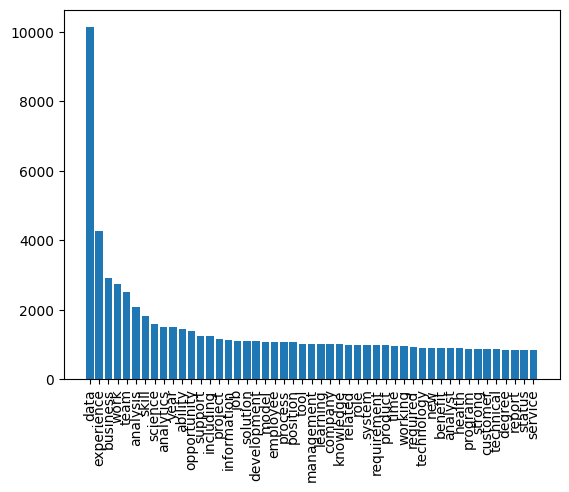

In [ ]:
import matplotlib.pyplot as plt

sorted_Keys = sorted(word_count, key = word_count.get, reverse =  True) # x축
sorted_Values = sorted(word_count.values(), reverse = True) # y축

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical') # x축 눈금
plt.show() # 그래프 출력

In [ ]:
del word_count['data']
del word_count['science']

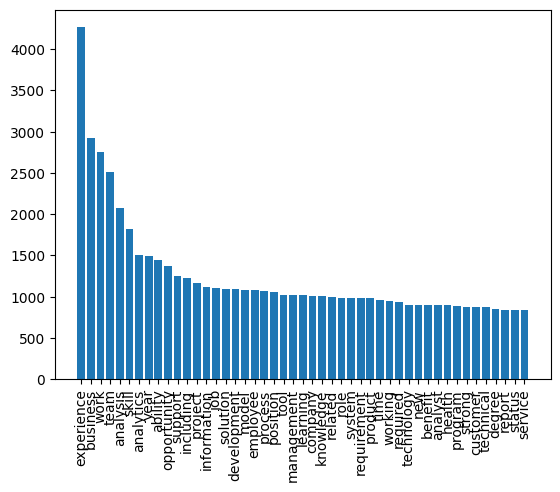

In [ ]:
import matplotlib.pyplot as plt

sorted_Keys = sorted(word_count, key = word_count.get, reverse =  True) # x축
sorted_Values = sorted(word_count.values(), reverse = True) # y축

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical') # x축 눈금
plt.show() # 그래프 출력

In [ ]:
from wordcloud import STOPWORDS, WordCloud

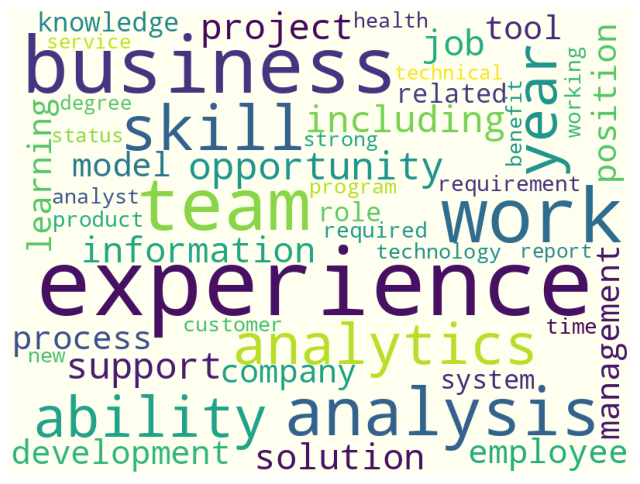

In [ ]:
stopwords = set(STOPWORDS) # 불용어 설정
wc = WordCloud(background_color = 'ivory', stopwords=stopwords, width=800, height=600) # 워드클라우드 객체 생성
cloud = wc.generate_from_frequencies(word_count) # 단어 빈도수
plt.figure(figsize=(8,8))
plt.imshow(cloud) # 워드 클라우드 생성
plt.axis('off')
plt.show()